In [1]:
import os

In [2]:
os.getcwd()

'/home/nbuser'

In [3]:
import pandas as pd

In [4]:
import requests

In [5]:
import io

In [6]:
url = 'https://gist.githubusercontent.com/ayakimovichz/7fb08897dfa210a67ab9b389cb6b5945/raw/840ffdf427ac375ccc6fc1172b8137810fc90e7c/surveys.csv'

In [7]:
s=requests.get(url).content

In [8]:
surveys_df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [9]:
surveys_df.head(10)

,record_id,month,day,year,plot,species,sex,wgt
0,1,7,16,1977,2,NL,M,NaN
1,2,7,16,1977,3,NL,M,NaN
2,3,7,16,1977,2,DM,F,NaN
3,4,7,16,1977,7,DM,M,NaN
4,5,7,16,1977,3,DM,M,NaN
5,6,7,16,1977,1,PF,M,NaN
6,7,7,16,1977,2,PE,F,NaN
7,8,7,16,1977,1,DM,M,NaN
8,9,7,16,1977,1,DM,F,NaN
9,10,7,16,1977,6,PF,F,NaN


In [10]:
surveys_df.describe()

/home/nbuser/anaconda2_410/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,record_id,month,day,year,plot,wgt
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,NaN
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,NaN
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,NaN
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,280.000000


In [11]:
surveys_df.mean()

record_id    17775.000000
month            6.474022
day             16.105966
year          1990.475231
plot            11.397001
wgt             42.672428
dtype: float64

In [12]:
surveys_df['wgt'].mean()

42.672428212991356

In [13]:
# Mean / Median - Average weight per year

In [14]:
wgt_df1 = pd.Series(surveys_df.groupby('year')['wgt'].mean(), name='mean')

In [15]:
wgt_df2 = pd.Series(surveys_df.groupby('year')['wgt'].median(), name='median')

In [16]:
type(wgt_df1)

pandas.core.series.Series

In [17]:
# Join series in pandas

In [18]:
wgt_united = pd.concat([wgt_df1, wgt_df2], axis=1)

In [19]:
wgt_united

,mean,median
year,,
1977,46.650376,41.0
1978,67.911290,45.0
1979,63.390282,46.0
1980,62.448747,46.0
1981,65.843888,47.0
1982,53.765888,41.0
1983,55.102828,41.0
1984,50.955682,41.0
1985,46.694570,41.0


In [20]:
# Plot mean and median values over time

In [21]:
import matplotlib

In [23]:
%matplotlib inline

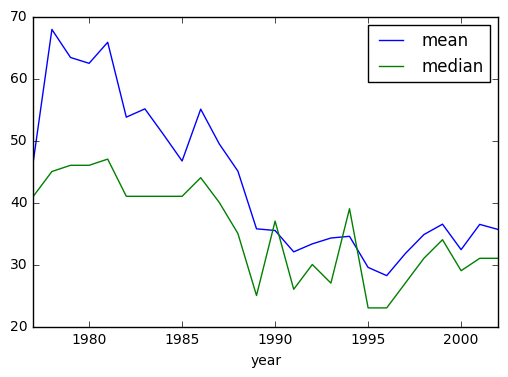

In [24]:
wgt_united.plot(kind="line")

In [25]:
import matplotlib.pyplot as plt

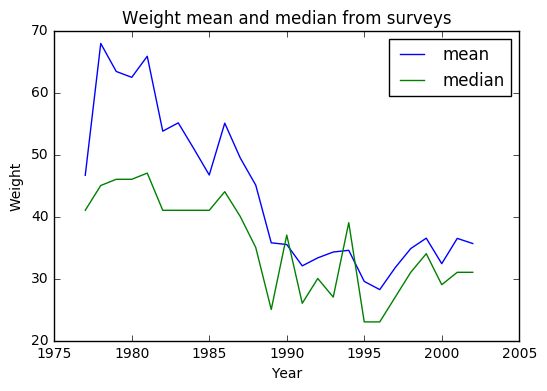

In [26]:
plt.plot(wgt_united, label="My data", linewidth=1)
plt.xlabel("Year")
plt.ylabel("Weight")
plt.title("Weight mean and median from surveys")
plt.legend(['mean', 'median'], loc='upper right')
plt.savefig("wgt_plot.png")

In [27]:
surveys_df.groupby('year')['wgt'].mean()

year
1977    46.650376
1978    67.911290
1979    63.390282
1980    62.448747
1981    65.843888
1982    53.765888
1983    55.102828
1984    50.955682
1985    46.694570
1986    55.053927
1987    49.443639
1988    45.055765
1989    35.754691
1990    35.483044
1991    32.040033
1992    33.328160
1993    34.271028
1994    34.546595
1995    29.530387
1996    28.207174
1997    31.761885
1998    34.826523
1999    36.503256
2000    32.394591
2001    36.469529
2002    35.641555
Name: wgt, dtype: float64

In [51]:
# Median Absolute Deviation
# https://en.wikipedia.org/wiki/Median_absolute_deviation
# http://stackoverflow.com/questions/29778636/median-of-pandas-dataframe

In [41]:
dt=pd.Series(surveys_df.groupby('species')['record_id'].count(), name='count')

In [42]:
dt

species
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: count, dtype: int64

In [43]:
dm = surveys_df.groupby('species')['record_id'].count().median()

In [47]:
d_mad = pd.Series(abs(dt-dm), name='dist')

In [48]:
df_mad = pd.concat([dt, d_mad], axis = 1)

In [49]:
df_mad

,count,dist
species,,
AB,303,265.5
AH,437,399.5
AS,2,35.5
BA,46,8.5
CB,50,12.5
CM,13,24.5
CQ,16,21.5
CS,1,36.5
CT,1,36.5


In [52]:
df_mad['dist'].median()

36.0

In [53]:
df_mad['mad']=df_mad['dist'].median()

In [54]:
df_mad

,count,dist,mad
species,,,
AB,303,265.5,36.0
AH,437,399.5,36.0
AS,2,35.5,36.0
BA,46,8.5,36.0
CB,50,12.5,36.0
CM,13,24.5,36.0
CQ,16,21.5,36.0
CS,1,36.5,36.0
CT,1,36.5,36.0


In [56]:
# Standard deviation

In [55]:
df_mad['count'].std()

1728.925837454701

In [60]:
# Quantiles / Percentiles

In [57]:
df_mad['count'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05       1.0
0.25       5.0
0.50      37.5
0.75     552.5
0.95    2979.4
Name: count, dtype: float64

In [58]:
df_mad['count'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.1        1.0
0.2        4.0
0.3        8.0
0.4       11.6
0.5       37.5
0.6       46.8
0.7      237.9
0.8     1153.6
0.9     2535.5
1.0    10596.0
Name: count, dtype: float64

In [59]:
df_mad['count'].quantile([0.95,0.90,0.85,0.85,0.80,0.75])

0.95    2979.4
0.90    2535.5
0.85    1582.1
0.85    1582.1
0.80    1153.6
0.75     552.5
Name: count, dtype: float64

In [62]:
# Mode (most commonly occured value)

In [61]:
df_mad['count'].mode()

0    1
dtype: int64

In [64]:
# Variance

In [63]:
df_mad['count'].var()

2989184.551418439

In [65]:
plot_mad_quantiles = df_mad['count'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

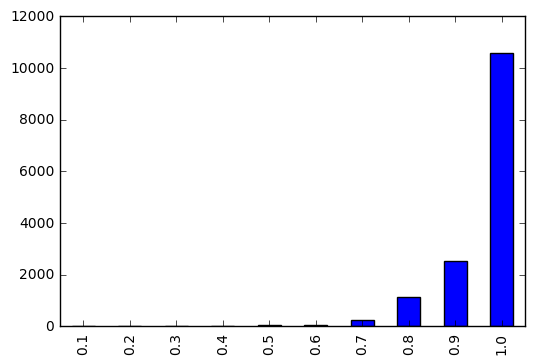

In [66]:
plot_mad_quantiles.plot(kind='bar')